# Final Project

## 2.1 Finding a Dataset

The dataset I chose for the project is [Appliances Energy Prediction](https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2.1.1-2.1.4 Confirming the dataset can be used for the final project 

In [2]:
energy_data = pd.read_csv('energydata_complete.csv')

In [3]:
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
energy_data.shape 

(19735, 29)

The dataset has enough rows, and enough continuous features to meet the criteria needed for the final project.  

## 2.2 Introduction

This dataset has measurements of the amount of energy used by appliances and lighting within an energy efficient home along with the measured temperature and humidity from various points at the home combined with weather records from a nearby airport. These measurements were taken every 10 minutes for 4.5 months.

I want to find if temperature or another weather measurement has a linear relationship with the amount of energy used by appliances in the home. Therefore, the target variable I will look into is the amount of energy used by the appliances. 

The shape of the initial dataset is 19,735 rows, and 29 columns.



## 2.3 Data Cleaning 


### 2.3.1-2.3.2 
The dataset was imported above. The data contains no NA values based on the description of the file. 

Label the columns so that the data is easier to understand. 

In [5]:
print(energy_data.columns)

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [6]:
energy_data.rename(columns = 
           {
               "date": "date",
               "Appliances": "energy used by appliances (Wh)" ,
               "lights": "energy used by lights (Wh)",
               "T1"  : "Kitchen_T",
               "RH_1": "Kitchen_H",
               "T2"  : "Living_Room_T",
               "RH_2": "Living_Room_H",
               "T3"  : "Laundry_Room_T",
               "RH_3": "Laundry_Room_H",
               "T4"  : "Office_T",
               "RH_4": "Office_H",
               "T5"  : "Bathroom_T",
               "RH_5": "Bathroom_H",
               "T6"  : "Outside_Building_T",
               "RH_6": "Outside_Building_H",
               "T7"  : "Ironing_Room_T",
               "RH_7": "Ironing_Room_H",
               "T8"  : "Teenager_Room_T", 
               "RH_8": "Teenager_Room_H", 
               "T9"  : "Parents_Room_T",
               "RH_9": "Parents_Room_H",
               "T_out"  : "Outside_Area_T",
               "Press_mm_hg" : "Outside_Area_Pressure",  
               "RH_out" : "Outside_Area_H",
               "Windspeed" : "Outside_Area_Wind_Speed",
               "Visibility" : "Outside_Area_Visibility",
               "Tdewpoint" : "Outside_Area_Dewpoint",
               "rv1" : "Random_variable_1", 
               "rv2" : "Random_variable_2"  
           }, inplace=True)

print(energy_data.columns)

Index(['date', 'energy used by appliances (Wh)', 'energy used by lights (Wh)',
       'Kitchen_T', 'Kitchen_H', 'Living_Room_T', 'Living_Room_H',
       'Laundry_Room_T', 'Laundry_Room_H', 'Office_T', 'Office_H',
       'Bathroom_T', 'Bathroom_H', 'Outside_Building_T', 'Outside_Building_H',
       'Ironing_Room_T', 'Ironing_Room_H', 'Teenager_Room_T',
       'Teenager_Room_H', 'Parents_Room_T', 'Parents_Room_H', 'Outside_Area_T',
       'Outside_Area_Pressure', 'Outside_Area_H', 'Outside_Area_Wind_Speed',
       'Outside_Area_Visibility', 'Outside_Area_Dewpoint', 'Random_variable_1',
       'Random_variable_2'],
      dtype='object')


Initially I dropped the random variables but for now I'll keep them to see if there is any correlation.

In [7]:
#energy_data.drop(columns=["Random variable 1"], inplace = True)
#energy_data.drop(columns=["Random variable 2"], inplace = True)
#energy_data.head()

In [8]:
#print(energy_data.columns)

### 2.3.3 Insuring the columns are the right type. 

In [9]:
#check all the data types for all the elements in the first row of the energy_data DataFrame

first_row = energy_data.iloc[0]

for col, value in first_row.items():
    print(f'The data type of element in {col} column: {type(value)}')

The data type of element in date column: <class 'str'>
The data type of element in energy used by appliances (Wh) column: <class 'numpy.int64'>
The data type of element in energy used by lights (Wh) column: <class 'numpy.int64'>
The data type of element in Kitchen_T column: <class 'numpy.float64'>
The data type of element in Kitchen_H column: <class 'numpy.float64'>
The data type of element in Living_Room_T column: <class 'numpy.float64'>
The data type of element in Living_Room_H column: <class 'numpy.float64'>
The data type of element in Laundry_Room_T column: <class 'numpy.float64'>
The data type of element in Laundry_Room_H column: <class 'numpy.float64'>
The data type of element in Office_T column: <class 'numpy.float64'>
The data type of element in Office_H column: <class 'numpy.float64'>
The data type of element in Bathroom_T column: <class 'numpy.float64'>
The data type of element in Bathroom_H column: <class 'numpy.float64'>
The data type of element in Outside_Building_T column

### 2.3.4 Creating categorical columns from numerical data. 

In [10]:
#Create the categorical data for dewpoint by setting it to high if the value is above the 75th percentile and low otherwise. 
dewpoint_75th = energy_data['Outside_Area_Dewpoint'].quantile(0.75)
energy_data['dewpoint_categorical'] = np.where(energy_data['Outside_Area_Dewpoint'] > dewpoint_75th, 'high', 'low')
energy_data.head()

,date,energy used by appliances (Wh),energy used by lights (Wh),Kitchen_T,Kitchen_H,Living_Room_T,Living_Room_H,Laundry_Room_T,Laundry_Room_H,Office_T,...,Parents_Room_H,Outside_Area_T,Outside_Area_Pressure,Outside_Area_H,Outside_Area_Wind_Speed,Outside_Area_Visibility,Outside_Area_Dewpoint,Random_variable_1,Random_variable_2,dewpoint_categorical
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,low
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,low
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,low
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,low
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,low


In [11]:
#Create the categorical data for windspeed by setting it to high if the value is above the 75th percentile and low otherwise. 
windspeed_75th = energy_data['Outside_Area_Wind_Speed'].quantile(0.75)
energy_data['windspeed_categorical'] = np.where(energy_data['Outside_Area_Wind_Speed'] > windspeed_75th, 'high', 'low')
energy_data.head()

,date,energy used by appliances (Wh),energy used by lights (Wh),Kitchen_T,Kitchen_H,Living_Room_T,Living_Room_H,Laundry_Room_T,Laundry_Room_H,Office_T,...,Outside_Area_T,Outside_Area_Pressure,Outside_Area_H,Outside_Area_Wind_Speed,Outside_Area_Visibility,Outside_Area_Dewpoint,Random_variable_1,Random_variable_2,dewpoint_categorical,windspeed_categorical
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,low,high
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,low,high
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,low,high
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,low,high
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,low,high


Confriming the data type is a string for the categorical columns

In [12]:
print(type(energy_data['dewpoint_categorical'].iloc[0]))

<class 'str'>


In [13]:
print(type(energy_data['windspeed_categorical'].iloc[0]))

<class 'str'>


## 2.4 Exploratory Analysis

### 2.4.1 Histogram and KDE

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: energy used by appliances (Wh), dtype: float64


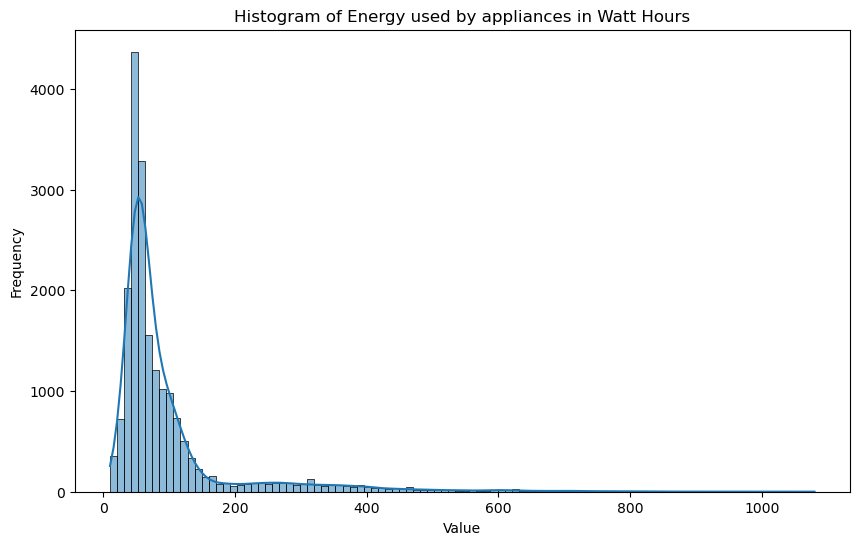

In [14]:
print(energy_data['energy used by appliances (Wh)'].describe())
plt.figure(figsize=(10,6))
sns.histplot(energy_data['energy used by appliances (Wh)'], bins=100, kde=True, edgecolor='black')
#sns.kdeplot(energy_data['energy used by appliances (Wh)'], color='red', linewidth=2)
plt.title('Histogram of Energy used by appliances in Watt Hours')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

The data does not have a normal distribution, this is because the energy usage can't be negative. This causes the distribution not to be symmetrical around the mean. 

### 2.4.2 Trying to understand the data in order to determine the features I want to use to model the target variable.

I want to understand temperature data, and determine if there are significant differences between the outdoor readings, and if there are differences between the indoor readings. If there are not significant differences I can remove this data. I'll do this by analyzing the describe results for various columns in the dataframe.

In [15]:
#First I want to compare stats for the outside sensors
outside_data_stats_T = energy_data[['Outside_Building_T','Outside_Area_T']].describe()
outside_data_stats_H = energy_data[['Outside_Building_H','Outside_Area_H']].describe()
print(outside_data_stats_T)
print(outside_data_stats_H)

       Outside_Building_T  Outside_Area_T
count        19735.000000    19735.000000
mean             7.910939        7.411665
std              6.090347        5.317409
min             -6.065000       -5.000000
25%              3.626667        3.666667
50%              7.300000        6.916667
75%             11.256000       10.408333
max             28.290000       26.100000
       Outside_Building_H  Outside_Area_H
count        19735.000000    19735.000000
mean            54.609083       79.750418
std             31.149806       14.901088
min              1.000000       24.000000
25%             30.025000       70.333333
50%             55.290000       83.666667
75%             83.226667       91.666667
max             99.900000      100.000000


In [16]:
#Next I want to compare stats for the room sensors
inside_data_stats_T = energy_data[['Kitchen_T',
                                   'Living_Room_T',
                                   'Laundry_Room_T',
                                   'Office_T',
                                   'Bathroom_T',
                                   'Ironing_Room_T',
                                   'Teenager_Room_T',
                                   'Parents_Room_T']].describe()

inside_data_stats_H = energy_data[['Kitchen_H',
                                   'Living_Room_H',
                                   'Laundry_Room_H',
                                   'Office_H',
                                   'Bathroom_H',
                                   'Ironing_Room_H',
                                   'Teenager_Room_H',
                                   'Parents_Room_H']].describe()

print(inside_data_stats_T)
print(inside_data_stats_H)

          Kitchen_T  Living_Room_T  Laundry_Room_T      Office_T  \
count  19735.000000   19735.000000    19735.000000  19735.000000   
mean      21.686571      20.341219       22.267611     20.855335   
std        1.606066       2.192974        2.006111      2.042884   
min       16.790000      16.100000       17.200000     15.100000   
25%       20.760000      18.790000       20.790000     19.530000   
50%       21.600000      20.000000       22.100000     20.666667   
75%       22.600000      21.500000       23.290000     22.100000   
max       26.260000      29.856667       29.236000     26.200000   

         Bathroom_T  Ironing_Room_T  Teenager_Room_T  Parents_Room_T  
count  19735.000000    19735.000000     19735.000000    19735.000000  
mean      19.592106       20.267106        22.029107       19.485828  
std        1.844623        2.109993         1.956162        2.014712  
min       15.330000       15.390000        16.306667       14.890000  
25%       18.277500       18.700

In [17]:
#I also want to checkout the variation in other outside area data
other_outside_area_data_stats = energy_data[['Outside_Area_Pressure',
                                             'Outside_Area_Wind_Speed',
                                             'Outside_Area_Visibility',
                                             'Outside_Area_Dewpoint']].describe()
print(other_outside_area_data_stats)

       Outside_Area_Pressure  Outside_Area_Wind_Speed  \
count           19735.000000             19735.000000   
mean              755.522602                 4.039752   
std                 7.399441                 2.451221   
min               729.300000                 0.000000   
25%               750.933333                 2.000000   
50%               756.100000                 3.666667   
75%               760.933333                 5.500000   
max               772.300000                14.000000   

       Outside_Area_Visibility  Outside_Area_Dewpoint  
count             19735.000000           19735.000000  
mean                 38.330834               3.760707  
std                  11.794719               4.194648  
min                   1.000000              -6.600000  
25%                  29.000000               0.900000  
50%                  40.000000               3.433333  
75%                  40.000000               6.566667  
max                  66.000000        

Based on a preliminary look at the summary statistics in regard to the data collected from each sensor I can draw the following conclusions: 

The data from the sensors outside the house have a greater range than the one at the airport. I don't know how far the airport is from the house, I'm not sure whether the sensors at the house are impacted by the materials of the house and whether those materials store heat and whether that heat impacts the readings, It's doubtful that the sensors at the house are better quality than the ones at the airport. 

The data from the sensors within the house are relatively close to each other however I do observe that the Kitchen has the most stable temperatures with a std of 1.6, while the living room has the greatest variation in temperature with a std of 2.2. The parent's room appears to be kept at the coolest temperature with a mean that is 2 degrees lower than other rooms within the house. 

Based on this I want the independent variables to be as follows:
- Kitchen Temperature
- Parent Bedroom Temperature
- Living Room Temperature
- Outside Temperature as measured at the house 
- Difference in temperature between the average inside house temperature and the temperature measured at the weather station. 
- Wind speed where anything above the 75th percentile is considered high winds, anything below is considered low winds. This will be designated as "low" and "high" in the column. 
- Dew Point where anything about the 75th percentile is considered high and anything below is considered low. This will be designated as "low" and "high" in the column. 

I assume that temperature has a big impact on energy usage so I want to create a column that stores the delta in temperature between the average within the house, and that measured at the weather station. 

In [18]:
#Create a column for the average indoor temperature. 

energy_data['average_indoor_T'] = (
    energy_data['Kitchen_T'] + 
    energy_data['Living_Room_T'] +
    energy_data['Laundry_Room_T'] +
    energy_data['Office_T'] +
    energy_data['Bathroom_T'] +
    energy_data['Ironing_Room_T'] +
    energy_data['Teenager_Room_T'] +
    energy_data['Parents_Room_T']
) / 8

#use that column to compute the difference between the average indoor temperature and the outdoor temperature.
energy_data['temperature_difference'] = energy_data['average_indoor_T'] - energy_data['Outside_Area_T'] 

#Take the absolute value since I want to find the delta. 
energy_data['temperature_difference'] = energy_data['temperature_difference'].abs()

#Compare the data for temperature difference, average indoor temperature, and temperature as measured at the airport. 
energy_data[['temperature_difference','average_indoor_T','Outside_Area_T']].describe()


,temperature_difference,average_indoor_T,Outside_Area_T
count,19735.000000,19735.000000,19735.000000
mean,13.406746,20.815611,7.411665
std,4.193506,1.812567,5.317409
min,0.002083,16.012708,-5.000000
25%,10.668958,19.663000,3.666667
50%,13.589667,20.597500,6.916667
75%,16.293631,21.764375,10.408333
max,24.172708,26.061940,26.100000


In [19]:
print(energy_data.columns)

Index(['date', 'energy used by appliances (Wh)', 'energy used by lights (Wh)',
       'Kitchen_T', 'Kitchen_H', 'Living_Room_T', 'Living_Room_H',
       'Laundry_Room_T', 'Laundry_Room_H', 'Office_T', 'Office_H',
       'Bathroom_T', 'Bathroom_H', 'Outside_Building_T', 'Outside_Building_H',
       'Ironing_Room_T', 'Ironing_Room_H', 'Teenager_Room_T',
       'Teenager_Room_H', 'Parents_Room_T', 'Parents_Room_H', 'Outside_Area_T',
       'Outside_Area_Pressure', 'Outside_Area_H', 'Outside_Area_Wind_Speed',
       'Outside_Area_Visibility', 'Outside_Area_Dewpoint', 'Random_variable_1',
       'Random_variable_2', 'dewpoint_categorical', 'windspeed_categorical',
       'average_indoor_T', 'temperature_difference'],
      dtype='object')


The continuous variables I want to use to model the energy used by appliances are:
- Kitchen_T
- Living_Room_T
- Parents_Room_T
- average_indoor_T
- temperature_difference
- windspeed_categorical
- dewpoint_categorical


### 2.4.3 Plotting scatterplots with the chosen mumerical features. 

Text(0, 0.5, 'Energy used by appliances in watt hours')

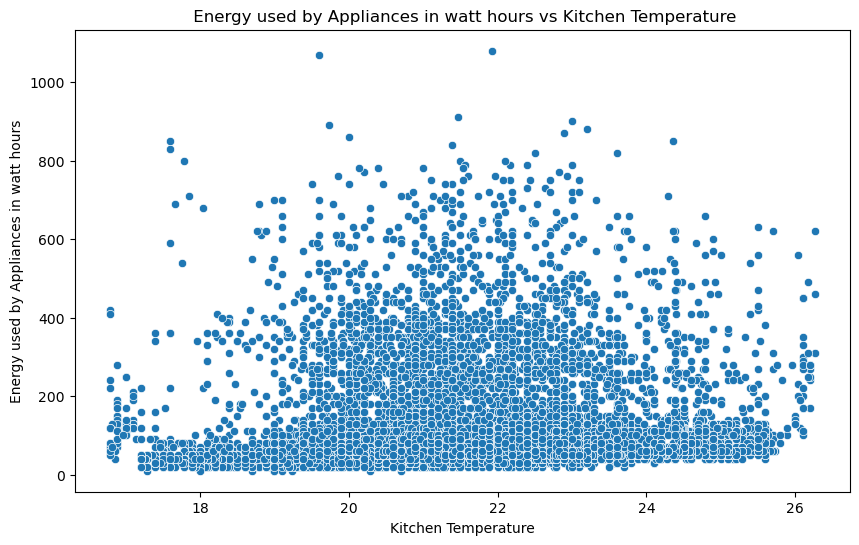

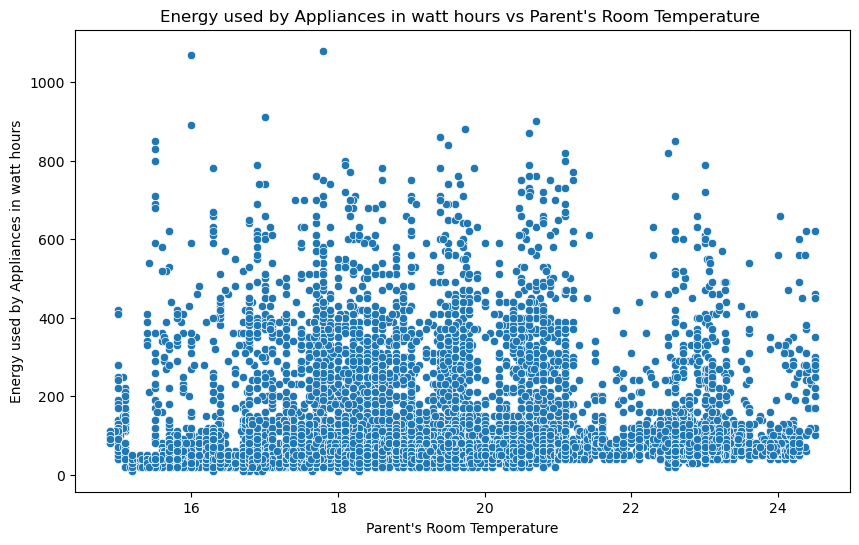

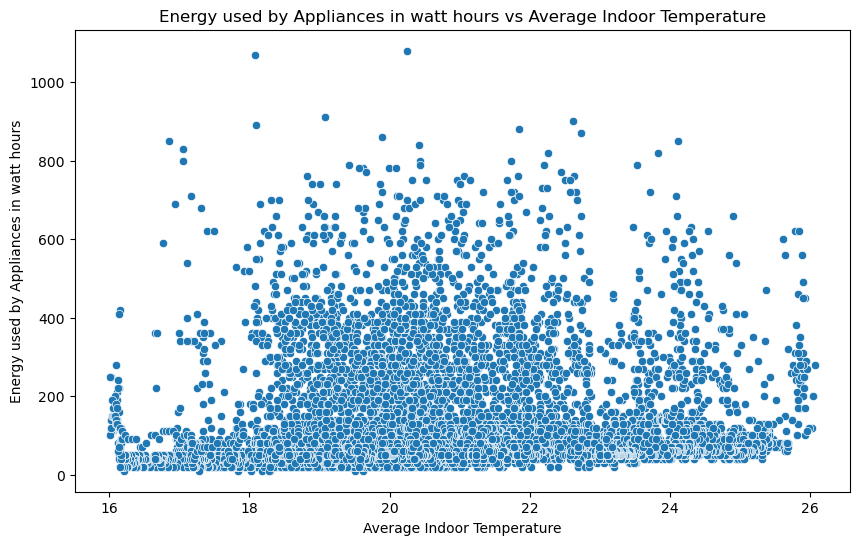

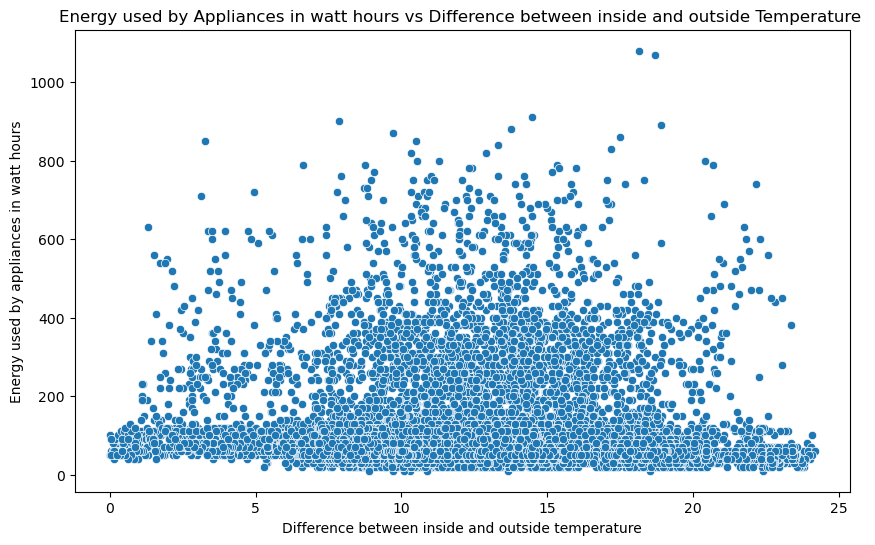

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Kitchen_T', y='energy used by appliances (Wh)',data=energy_data)
plt.title(' Energy used by Appliances in watt hours vs Kitchen Temperature')
plt.xlabel('Kitchen Temperature')
plt.ylabel('Energy used by Appliances in watt hours')

plt.figure(figsize=(10,6))
sns.scatterplot(x='Parents_Room_T', y='energy used by appliances (Wh)',data=energy_data)
plt.title("Energy used by Appliances in watt hours vs Parent's Room Temperature ")
plt.xlabel("Parent's Room Temperature")
plt.ylabel('Energy used by Appliances in watt hours')

plt.figure(figsize=(10,6))
sns.scatterplot(x='average_indoor_T', y='energy used by appliances (Wh)',data=energy_data)
plt.title("Energy used by Appliances in watt hours vs Average Indoor Temperature")
plt.xlabel("Average Indoor Temperature")
plt.ylabel('Energy used by Appliances in watt hours')

plt.figure(figsize=(10,6))
sns.scatterplot(x='temperature_difference', y='energy used by appliances (Wh)',data=energy_data)
plt.title("Energy used by Appliances in watt hours vs Difference between inside and outside Temperature ")
plt.xlabel("Difference between inside and outside temperature")
plt.ylabel('Energy used by appliances in watt hours')

Based on the scatter plots there doesn't seem to be any correlation between temperature and energy usage. It's possible that this is because measurements are taken so often, and energy usage by appliances can fluctuate a lot in a short period of time. It might be better to smooth out these fluctuations by taking an average usage for the whole day and see how that correlates with temperature. It will also make the scatter plots easier to read since they will have less data.  

Before averaging the data by day. I want to analyze a single day to see if I can see any patterns. 

In [21]:
#Create a dataframe with a single day's worth of data. I chose January 12th because this was the first full day of data. 

target_day = "2016-01-12"
june_twelth_data = energy_data[energy_data['date'].str.startswith(target_day)]
june_twelth_data.shape

(144, 33)

In [22]:
june_twelth_data.tail()

,date,energy used by appliances (Wh),energy used by lights (Wh),Kitchen_T,Kitchen_H,Living_Room_T,Living_Room_H,Laundry_Room_T,Laundry_Room_H,Office_T,...,Outside_Area_H,Outside_Area_Wind_Speed,Outside_Area_Visibility,Outside_Area_Dewpoint,Random_variable_1,Random_variable_2,dewpoint_categorical,windspeed_categorical,average_indoor_T,temperature_difference
181,2016-01-12 23:10:00,40,0,19.533333,43.000,18.808182,42.700000,19.79,44.530000,19.133333,...,83.333333,6.333333,40.0,2.866667,9.563005,9.563005,low,high,18.515725,12.932392
182,2016-01-12 23:20:00,40,0,19.500000,43.090,18.790000,42.756250,19.79,44.590000,19.100000,...,82.666667,6.666667,40.0,2.833333,44.322547,44.322547,low,high,18.483889,12.817222
183,2016-01-12 23:30:00,40,0,19.500000,43.090,18.790000,42.861667,19.79,44.590000,19.100000,...,82.000000,7.000000,40.0,2.800000,25.166974,25.166974,low,high,18.485625,12.735625
184,2016-01-12 23:40:00,50,0,19.500000,43.145,18.790000,43.000000,19.79,44.590000,19.100000,...,81.333333,7.333333,40.0,2.766667,43.852877,43.852877,low,high,18.495000,12.661667
185,2016-01-12 23:50:00,50,0,19.500000,43.200,18.775000,43.045000,19.89,44.826667,19.033333,...,80.666667,7.666667,40.0,2.733333,9.459681,9.459681,low,high,18.497292,12.580625


Text(0, 0.5, 'Energy used by Appliances in watt hours')

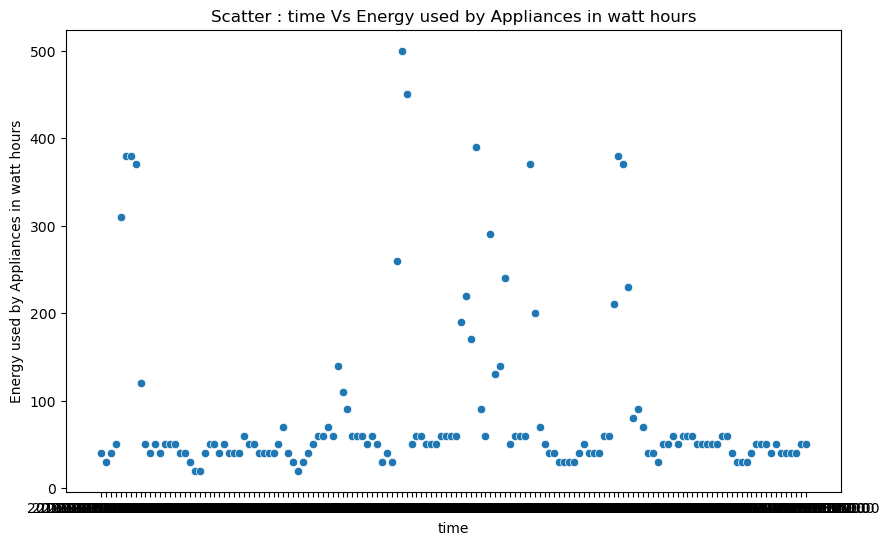

In [23]:
# Now I want to check the energy usage ploted against time of day to see if I can find any patters. 

plt.figure(figsize=(10,6))
sns.scatterplot(x='date', y='energy used by appliances (Wh)',data=june_twelth_data)
plt.title("Scatter : time Vs Energy used by Appliances in watt hours")
plt.xlabel("time")
plt.ylabel('Energy used by Appliances in watt hours')

Text(0, 0.5, 'Average Indoor Temperature')

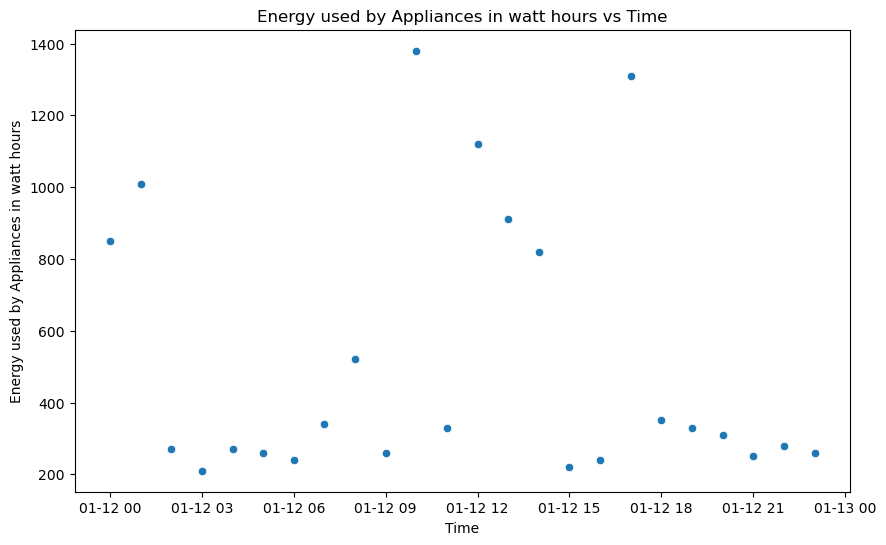

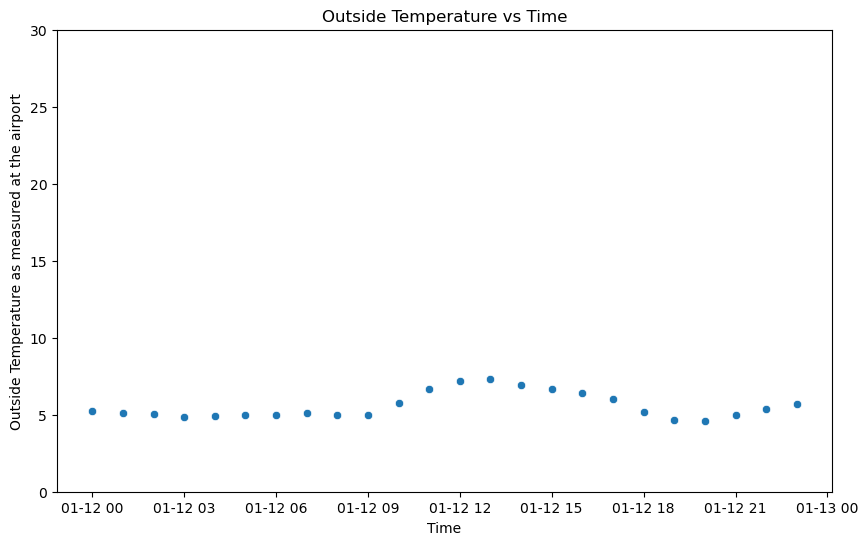

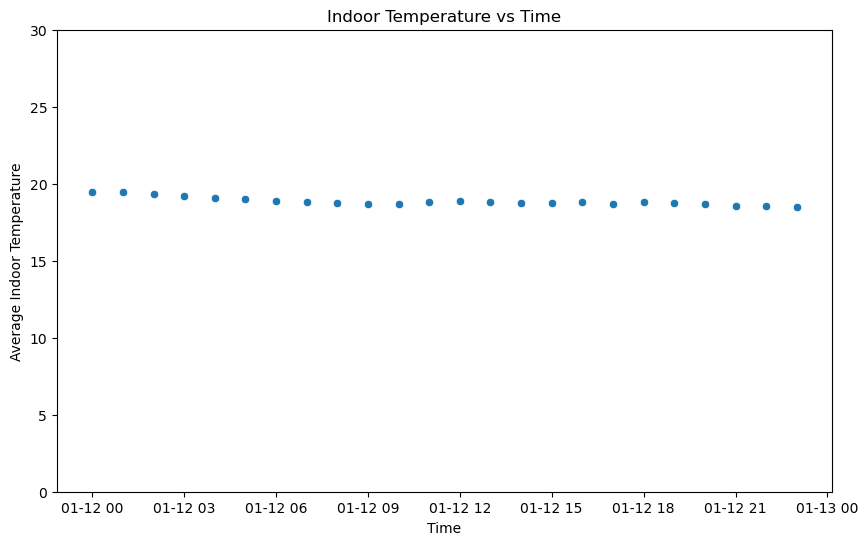

In [24]:
# The data is still not clear. Instead of using 10 minute increments, I want to average the data for an hour, 
# and see if I can discern any pattern from the data that was collected. 
# To do this I need to drop the categorical data columns 


june_twelth_data_no_categorical = june_twelth_data.drop(["dewpoint_categorical","windspeed_categorical"], axis=1)
#june_twelth_data.drop(columns=["windspeed_categorical"], inplace = True)
#june_twelth_data.reset_index(inplace=True)
june_twelth_data_no_categorical.columns

#To combine by date I need to convert the date column from string to datetime
june_twelth_data_no_categorical['date'] = pd.to_datetime(june_twelth_data_no_categorical['date'])
june_twelth_data_no_categorical.set_index('date', inplace=True)

#Sum used to calculate the total amount of energy used in an hour using the resample method. 
june_twelth_data_hourly=june_twelth_data_no_categorical.resample('H').sum()
june_twelth_data_hourly.shape

#june_twelth_data_hourly.reset_index(inplace=True)

# Create a scatterplot that shows the total amount of energy used per hour based on the time of day. 
plt.figure(figsize=(10,6))
sns.scatterplot(x='date', y='energy used by appliances (Wh)',data=june_twelth_data_hourly)
plt.title("Energy used by Appliances in watt hours vs Time")
plt.xlabel("Time")
plt.ylabel('Energy used by Appliances in watt hours')


#To get the average temperature for an hour I will need to resample and calculate the mean.  
june_twelth_data_hourly_mean=june_twelth_data_no_categorical.resample('H').mean()

# Create a scatterplot that shows the average outside temperature reading for the hour based on the time of day.
plt.figure(figsize=(10,6))
sns.scatterplot(x='date', y='Outside_Area_T',data=june_twelth_data_hourly_mean)
plt.ylim(0,30)
plt.title("Outside Temperature vs Time")
plt.xlabel("Time")
plt.ylabel('Outside Temperature as measured at the airport')


# Create a scatterplot that shows the average inside temperature reading for the hour based on the time of day. 
plt.figure(figsize=(10,6))
sns.scatterplot(x='date', y='average_indoor_T',data=june_twelth_data_hourly_mean)
plt.ylim(0,30)
plt.title("Indoor Temperature vs Time")
plt.xlabel("Time")
plt.ylabel('Average Indoor Temperature')

The scatter plots above again show there is no direct correlation between energy used and temperature inside or outside the house. 

Since the variation in energy usage throughout a single day is not linearly correlated with any of the features, we can try simplifying the data further by taking the total energy consumed for the day, and comparing that with average weather readings throughout the day. 

First, I will create a dataframe that resamples the average for the day. 
Then, I'll multiply the energy columns by 144 and take out the first and last day since they don't cover a complete 24 hours. 
Then I can further analyze the data for correlations

In [25]:
#Drop the catecorigcal columns so I can use the resample method. 
energy_data_no_categorical = energy_data.drop(["dewpoint_categorical","windspeed_categorical"], axis=1)

#Resample based on day 
energy_data_no_categorical['date']=pd.to_datetime(energy_data_no_categorical['date'])
energy_data_no_categorical.set_index('date', inplace = True)
energy_daily_mean=energy_data_no_categorical.resample('D').mean()
energy_daily_mean.head(1)

,energy used by appliances (Wh),energy used by lights (Wh),Kitchen_T,Kitchen_H,Living_Room_T,Living_Room_H,Laundry_Room_T,Laundry_Room_H,Office_T,Office_H,...,Outside_Area_T,Outside_Area_Pressure,Outside_Area_H,Outside_Area_Wind_Speed,Outside_Area_Visibility,Outside_Area_Dewpoint,Random_variable_1,Random_variable_2,average_indoor_T,temperature_difference
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,136.666667,30.0,20.808571,46.90621,20.153333,44.793175,20.140972,45.99244,19.492222,47.260813,...,5.922619,735.17381,89.285714,6.083333,40.845238,4.228571,26.2488,26.2488,18.977145,13.054526


In [26]:
#Increase the power usage in the columns to sums by multiplying them by 144 (the number of samples in each day.)
energy_daily_mean['energy used by appliances (Wh)'] = energy_daily_mean['energy used by appliances (Wh)'] * 144
energy_daily_mean['energy used by lights (Wh)'] = energy_daily_mean['energy used by lights (Wh)'] * 144
energy_daily_mean.head(2)

,energy used by appliances (Wh),energy used by lights (Wh),Kitchen_T,Kitchen_H,Living_Room_T,Living_Room_H,Laundry_Room_T,Laundry_Room_H,Office_T,Office_H,...,Outside_Area_T,Outside_Area_Pressure,Outside_Area_H,Outside_Area_Wind_Speed,Outside_Area_Visibility,Outside_Area_Dewpoint,Random_variable_1,Random_variable_2,average_indoor_T,temperature_difference
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,19680.0,4320.0,20.808571,46.906210,20.153333,44.793175,20.140972,45.992440,19.492222,47.260813,...,5.922619,735.173810,89.285714,6.083333,40.845238,4.228571,26.248800,26.248800,18.977145,13.054526
2016-01-12,12340.0,610.0,20.092326,45.142014,19.307655,43.779733,19.993646,44.933171,19.772778,44.556840,...,5.566319,742.628125,87.500000,5.784722,37.229167,3.596528,25.505072,25.505072,18.859262,13.292942


In [27]:
energy_daily_mean.tail(2)

,energy used by appliances (Wh),energy used by lights (Wh),Kitchen_T,Kitchen_H,Living_Room_T,Living_Room_H,Laundry_Room_T,Laundry_Room_H,Office_T,Office_H,...,Outside_Area_T,Outside_Area_Pressure,Outside_Area_H,Outside_Area_Wind_Speed,Outside_Area_Visibility,Outside_Area_Dewpoint,Random_variable_1,Random_variable_2,average_indoor_T,temperature_difference
date,,,,,,,,,,,,,,,,,,,,,
2016-05-26,21170.000000,450.000000,24.055271,42.417511,24.557538,38.836517,26.034081,38.775326,24.188176,40.728358,...,14.923611,756.619792,74.336806,1.850694,39.329861,9.636458,22.590179,22.590179,23.831353,8.907742
2016-05-27,19631.559633,92.477064,24.456330,46.208005,24.322729,43.420283,27.087699,40.811682,24.531437,43.707752,...,17.195413,755.784862,74.275229,2.041284,46.596330,12.246330,25.332458,25.332458,24.264163,7.068750


In [28]:
#Remove the first and last row based on the date index. 
energy_daily_mean = energy_daily_mean.drop(index=['2016-01-11','2016-05-27'])



In [29]:
energy_daily_mean.head(1)

,energy used by appliances (Wh),energy used by lights (Wh),Kitchen_T,Kitchen_H,Living_Room_T,Living_Room_H,Laundry_Room_T,Laundry_Room_H,Office_T,Office_H,...,Outside_Area_T,Outside_Area_Pressure,Outside_Area_H,Outside_Area_Wind_Speed,Outside_Area_Visibility,Outside_Area_Dewpoint,Random_variable_1,Random_variable_2,average_indoor_T,temperature_difference
date,,,,,,,,,,,,,,,,,,,,,
2016-01-12,12340.0,610.0,20.092326,45.142014,19.307655,43.779733,19.993646,44.933171,19.772778,44.55684,...,5.566319,742.628125,87.5,5.784722,37.229167,3.596528,25.505072,25.505072,18.859262,13.292942


In [30]:
energy_daily_mean.tail(1)

,energy used by appliances (Wh),energy used by lights (Wh),Kitchen_T,Kitchen_H,Living_Room_T,Living_Room_H,Laundry_Room_T,Laundry_Room_H,Office_T,Office_H,...,Outside_Area_T,Outside_Area_Pressure,Outside_Area_H,Outside_Area_Wind_Speed,Outside_Area_Visibility,Outside_Area_Dewpoint,Random_variable_1,Random_variable_2,average_indoor_T,temperature_difference
date,,,,,,,,,,,,,,,,,,,,,
2016-05-26,21170.0,450.0,24.055271,42.417511,24.557538,38.836517,26.034081,38.775326,24.188176,40.728358,...,14.923611,756.619792,74.336806,1.850694,39.329861,9.636458,22.590179,22.590179,23.831353,8.907742


Now that I have the resampled by day I will redraw scatter plots to see if there are any improvements. 

Text(0, 0.5, 'temperature difference')

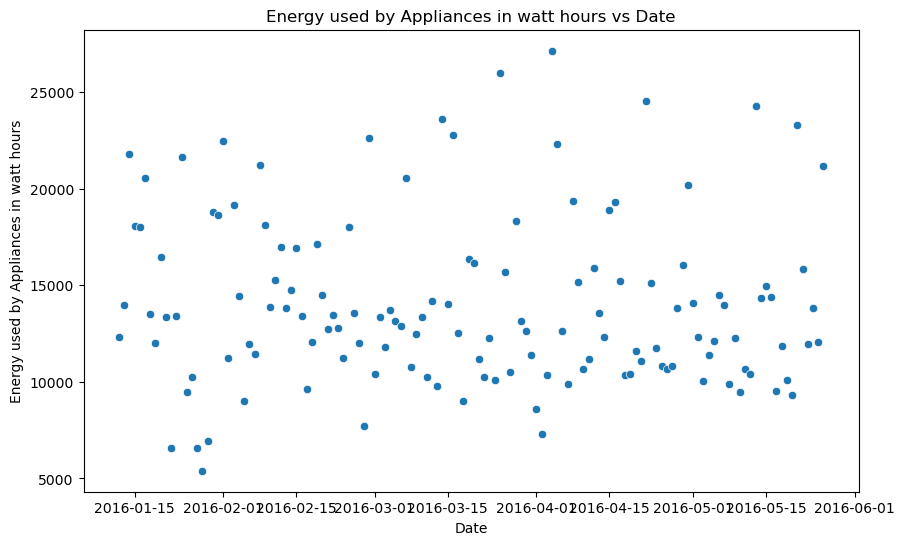

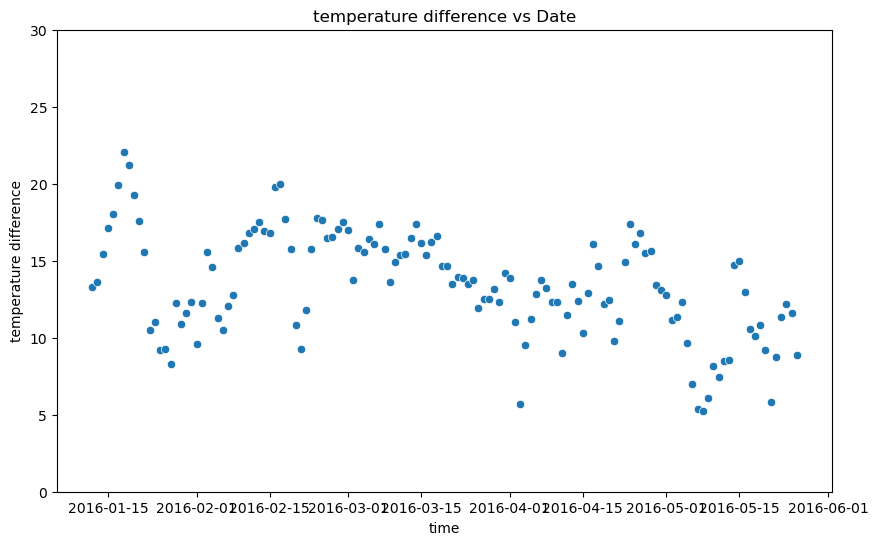

In [31]:

#Checking if there is any correlation with date. 
plt.figure(figsize=(10,6))
sns.scatterplot(x='date', y='energy used by appliances (Wh)',data=energy_daily_mean)

plt.title("Energy used by Appliances in watt hours vs Date")
plt.xlabel("Date")
plt.ylabel('Energy used by Appliances in watt hours')

plt.figure(figsize=(10,6))
sns.scatterplot(x='date', y='temperature_difference',data=energy_daily_mean)
plt.ylim(0,30)
plt.title("temperature difference vs Date")
plt.xlabel("time")
plt.ylabel('temperature difference')


The scatter plot for Energy usage vs date doesn't show any pattern while the temperature difference vs date does show that as we move further into the year, the difference between inside the home and outside the home decreases. 

Text(0, 0.5, 'Energy used by Appliances in watt hours')

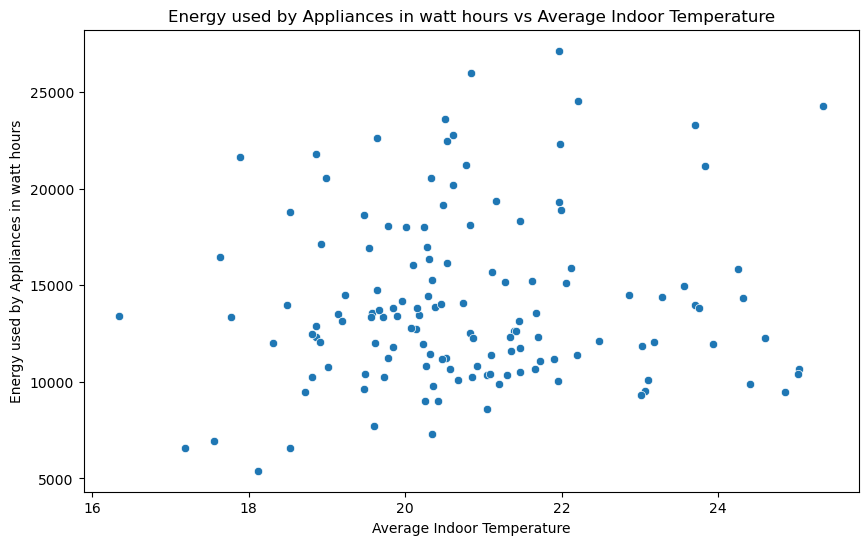

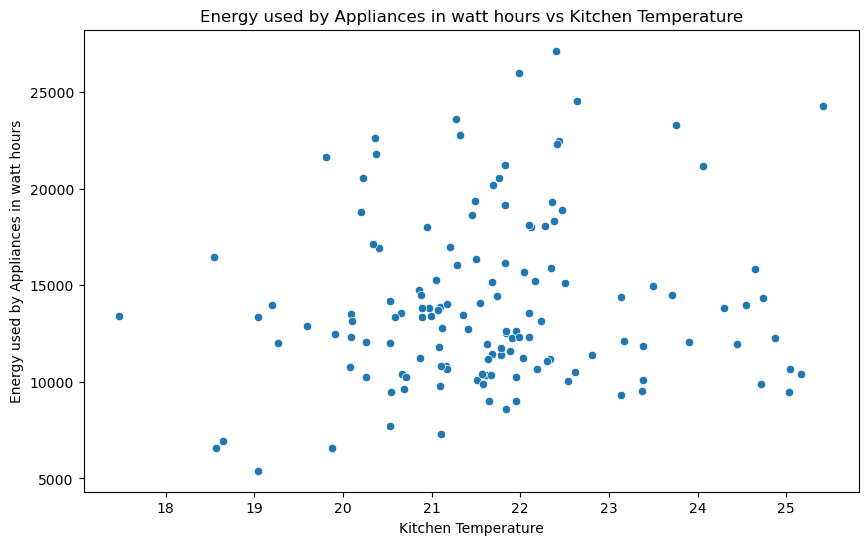

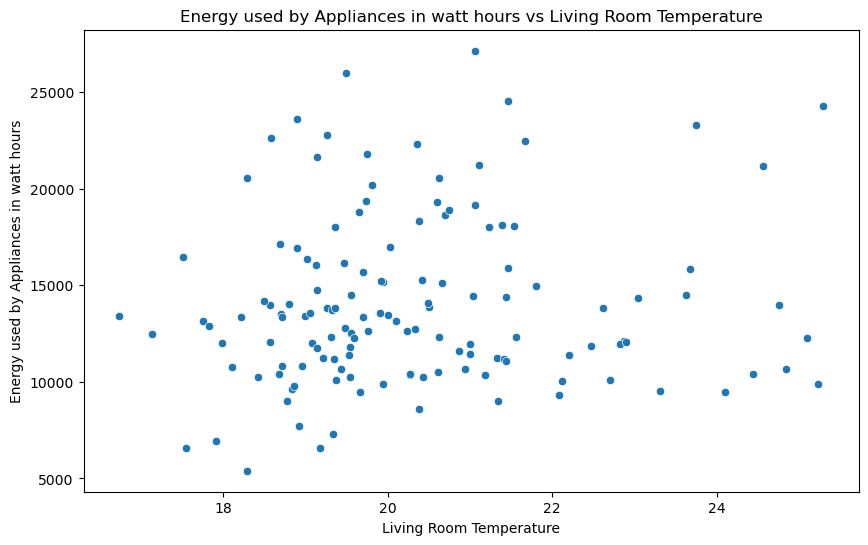

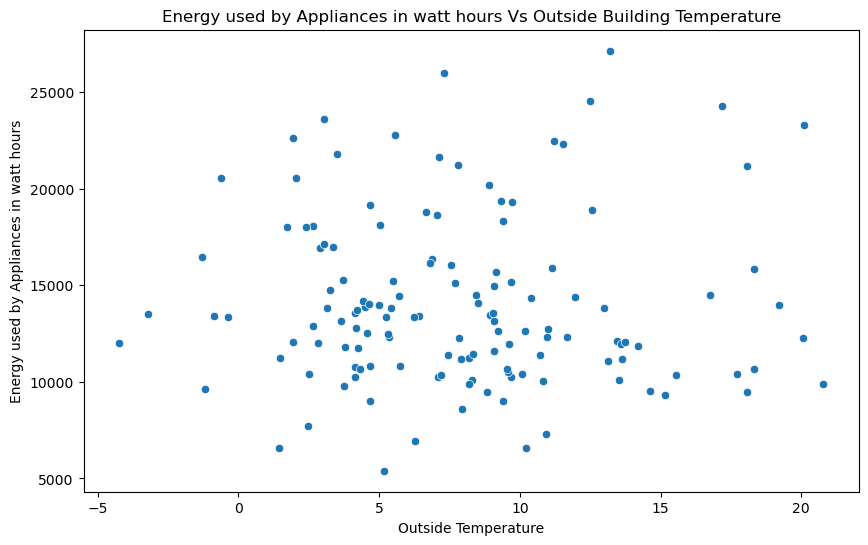

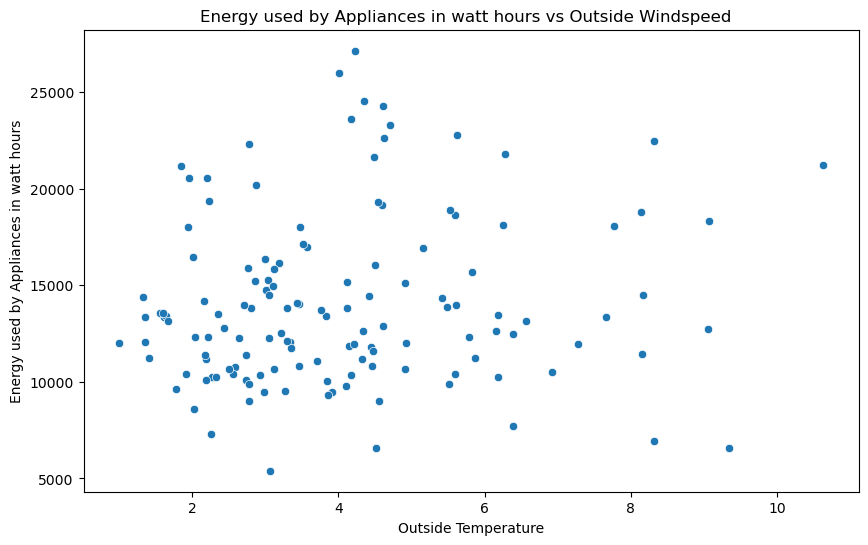

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='average_indoor_T', y='energy used by appliances (Wh)',data=energy_daily_mean)
plt.title("Energy used by Appliances in watt hours vs Average Indoor Temperature")
plt.xlabel("Average Indoor Temperature")
plt.ylabel('Energy used by Appliances in watt hours')

plt.figure(figsize=(10,6))
sns.scatterplot(x='Kitchen_T', y='energy used by appliances (Wh)',data=energy_daily_mean)
plt.title('Energy used by Appliances in watt hours vs Kitchen Temperature')
plt.xlabel('Kitchen Temperature')
plt.ylabel('Energy used by Appliances in watt hours')

plt.figure(figsize=(10,6))
sns.scatterplot(x='Living_Room_T', y='energy used by appliances (Wh)',data=energy_daily_mean)
plt.title('Energy used by Appliances in watt hours vs Living Room Temperature')
plt.xlabel('Living Room Temperature')
plt.ylabel('Energy used by Appliances in watt hours')

plt.figure(figsize=(10,6))
sns.scatterplot(x='Outside_Building_T', y='energy used by appliances (Wh)',data=energy_daily_mean)
plt.title('Energy used by Appliances in watt hours Vs Outside Building Temperature')
plt.xlabel('Outside Temperature')
plt.ylabel('Energy used by Appliances in watt hours')

plt.figure(figsize=(10,6))
sns.scatterplot(x='Outside_Area_Wind_Speed', y='energy used by appliances (Wh)',data=energy_daily_mean)
plt.title('Energy used by Appliances in watt hours vs Outside Windspeed  ')
plt.xlabel('Outside Temperature')
plt.ylabel('Energy used by Appliances in watt hours')

The scatterplots are easier to read, but still don't show any clear pattern. 

### 2.4.4 Creating box plots for the categorical variables. 


I need to recreate the categorical data based on the average measurements for wind speed and dewpoint

Incorporate the categorical data and see what regressions things we can find. Check for correlation between features

In [33]:
#Create the categorical data for dewpoint
daily_dewpoint_75th = energy_daily_mean['Outside_Area_Dewpoint'].quantile(0.75)
energy_daily_mean['dewpoint_categorical'] = np.where(energy_daily_mean['Outside_Area_Dewpoint'] > daily_dewpoint_75th, 'high', 'low')
energy_daily_mean.shape

(136, 31)

In [34]:
#Create the categorical data for windspeed
daily_windspeed_75th = energy_daily_mean['Outside_Area_Wind_Speed'].quantile(0.75)
energy_daily_mean['windspeed_categorical'] = np.where(energy_daily_mean['Outside_Area_Wind_Speed'] > daily_windspeed_75th, 'high', 'low')
energy_daily_mean.shape

(136, 32)

Text(0, 0.5, 'Energy used by Appliances in watt hours')

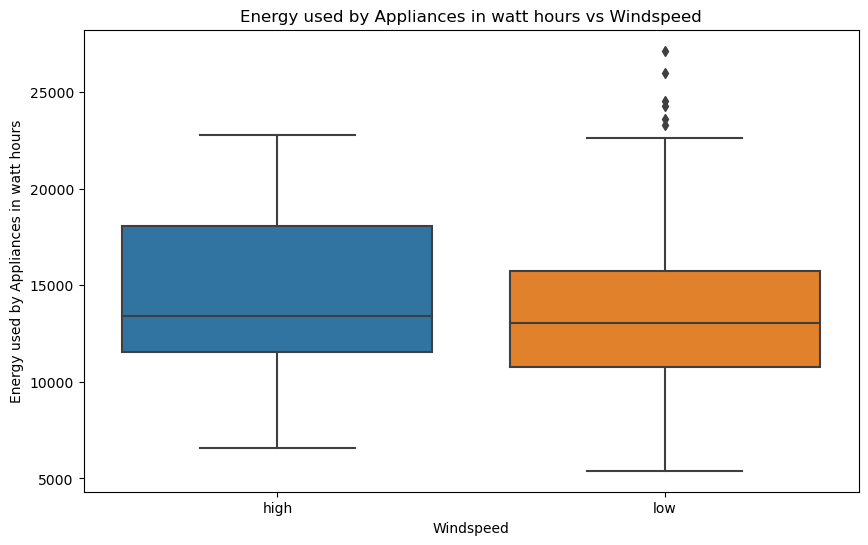

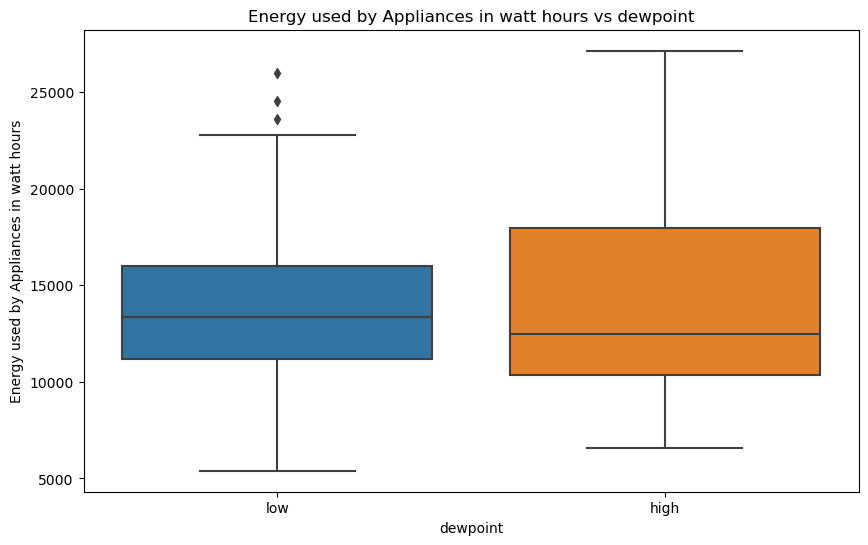

In [35]:
#Create Box Plots
plt.figure(figsize=(10,6))
sns.boxplot(x='windspeed_categorical', y='energy used by appliances (Wh)',data=energy_daily_mean)
plt.title("Energy used by Appliances in watt hours vs Windspeed")
plt.xlabel("Windspeed")
plt.ylabel('Energy used by Appliances in watt hours')

plt.figure(figsize=(10,6))
sns.boxplot(x='dewpoint_categorical', y='energy used by appliances (Wh)',data=energy_daily_mean)
plt.title("Energy used by Appliances in watt hours vs dewpoint")
plt.xlabel("dewpoint")
plt.ylabel('Energy used by Appliances in watt hours')



The categorical variables may be useful in modeling Y, as it seems that slightly more energy is used on days when the dewpoint is high, or when the wind speed is high. 

### 2.4.5 Plotting correlation between features. 


Checking for corelation between the features. To do this I want to create a heat map 

In [36]:
energy_daily_mean.columns

Index(['energy used by appliances (Wh)', 'energy used by lights (Wh)',
       'Kitchen_T', 'Kitchen_H', 'Living_Room_T', 'Living_Room_H',
       'Laundry_Room_T', 'Laundry_Room_H', 'Office_T', 'Office_H',
       'Bathroom_T', 'Bathroom_H', 'Outside_Building_T', 'Outside_Building_H',
       'Ironing_Room_T', 'Ironing_Room_H', 'Teenager_Room_T',
       'Teenager_Room_H', 'Parents_Room_T', 'Parents_Room_H', 'Outside_Area_T',
       'Outside_Area_Pressure', 'Outside_Area_H', 'Outside_Area_Wind_Speed',
       'Outside_Area_Visibility', 'Outside_Area_Dewpoint', 'Random_variable_1',
       'Random_variable_2', 'average_indoor_T', 'temperature_difference',
       'dewpoint_categorical', 'windspeed_categorical'],
      dtype='object')

In [37]:
# For the correlation plot I wanted to include the difference in humidity between the inside of 
# The house and the outside as measured at the weather station. So I created an humidity_difference column. 

#Create a column for the average temperature. 

energy_daily_mean['average_indoor_H'] = (
    energy_daily_mean['Kitchen_H'] + 
    energy_daily_mean['Living_Room_H'] +
    energy_daily_mean['Laundry_Room_H'] +
    energy_daily_mean['Office_H'] +
    energy_daily_mean['Bathroom_H'] +
    energy_daily_mean['Ironing_Room_H'] +
    energy_daily_mean['Teenager_Room_H'] +
    energy_daily_mean['Parents_Room_H']
) / 8

#use that column to compute the difference between the average indoor temperature and the outdoor temperature 


In [38]:
energy_daily_mean['humidity_difference'] = energy_daily_mean['Outside_Area_H'] - energy_daily_mean['average_indoor_H']  
energy_daily_mean['humidity_difference'].describe()


count    136.000000
mean      38.578873
std        8.020810
min       11.397629
25%       34.109721
50%       39.398042
75%       44.474402
max       56.111370
Name: humidity_difference, dtype: float64

The continuous variables I want to look at first to model the energy used by appliances are:

1. Kitchen_T
2. Living_Room_T
3. temperature_difference
4. humidity_difference
4. Random Variable 1
5. Random Variable 2

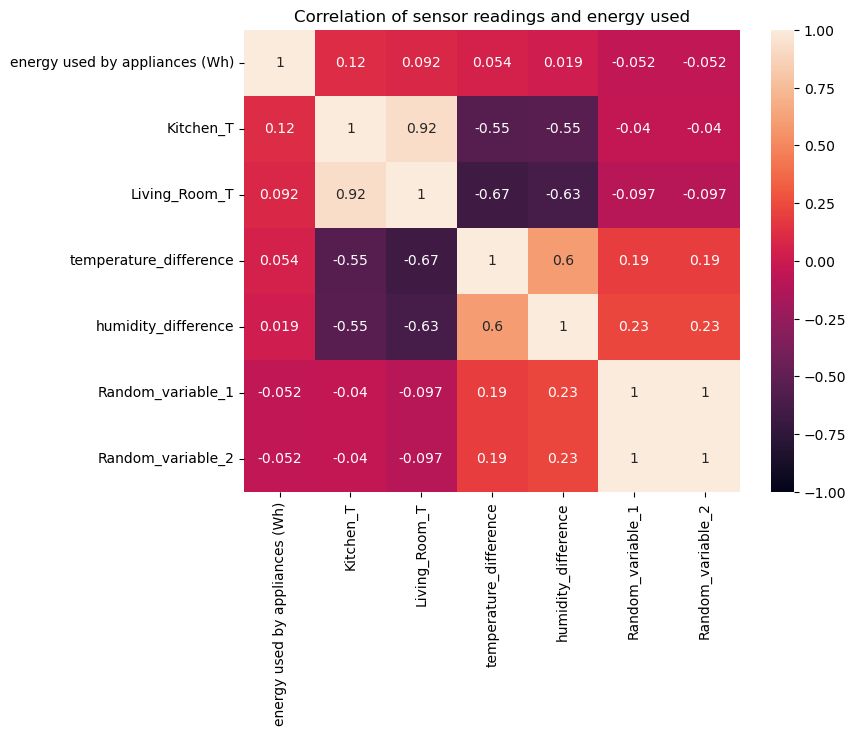

In [39]:
#creating a heatmap
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(energy_daily_mean[['energy used by appliances (Wh)', 
                               'Kitchen_T', 
                               'Living_Room_T',
                               'temperature_difference',
                               'humidity_difference',
                               'Random_variable_1',
                               'Random_variable_2',
                             ]].corr(),
           vmin=-1,
           vmax=1,
           annot=True, ax=ax
)
plt.title('Correlation of sensor readings and energy used')
plt.show()

I didn't see a high correlation between these features. So I checked some of the other features. Here are the ones with the highest correlation to the energy used by the appliances. Also these features are not correlated with each other.  

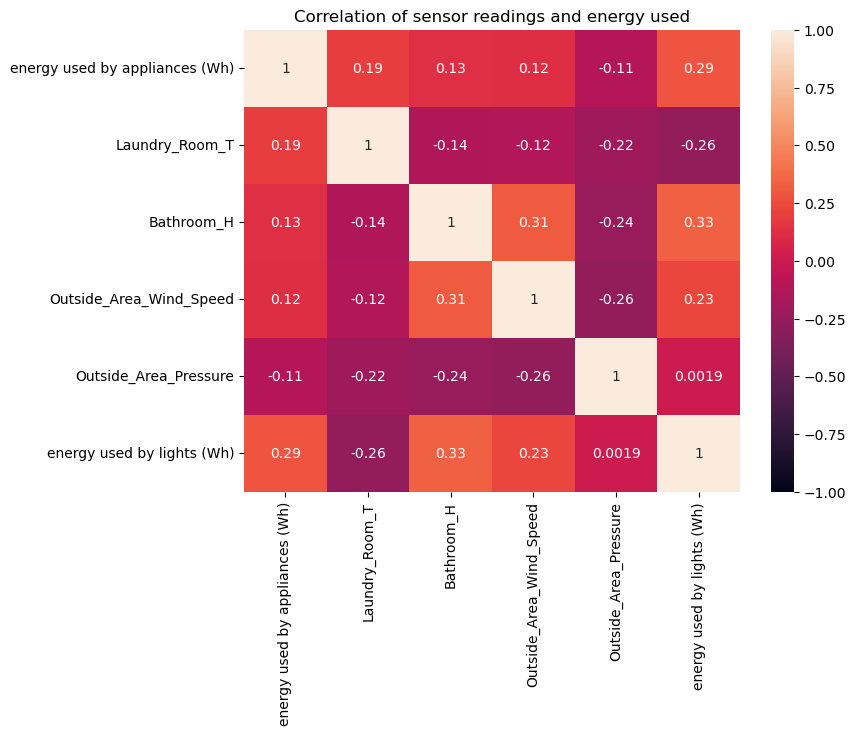

In [40]:
#creating a heatmap
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(energy_daily_mean[['energy used by appliances (Wh)', 
                               'Laundry_Room_T', 
                               'Bathroom_H',
                               'Outside_Area_Wind_Speed',
                               'Outside_Area_Pressure',
                               'energy used by lights (Wh)',
                             ]].corr(),
           vmin=-1,
           vmax=1,
           annot=True, ax=ax
)
plt.title('Correlation of sensor readings and energy used')
plt.show()

Based on the correlation matrix, the amount of energy used by appliances correlates most with the following features:
1. Energy used by lights
2. Laundry Room Temperature
3. Bathroom Humidity
4. Outside wind speed 
5. Outside Area Pressure 



## 2.5 Modeling Using Linear Regression

### 2.5.1 Converting the categorical variable back numerical


In [41]:
# Converting the categorical features to numerical features
energy_daily_mean['dewpoint_categorical_numeric'] = energy_daily_mean['dewpoint_categorical'].map({'high':1, 'low':0})
energy_daily_mean['dewpoint_categorical_numeric'].value_counts()

dewpoint_categorical_numeric
0    102
1     34
Name: count, dtype: int64

In [42]:
#creating a copy to be used for my second attempt at finding a linear relationship between features. 
energy_daily_mean_copy = energy_daily_mean.copy()

### 2.5.2 Create a variable labeled X to hold your feature matrix. Create a variable y to hold your target variable.

In [43]:
X = energy_daily_mean[['energy used by lights (Wh)', 
                       'Laundry_Room_T',
                       'Bathroom_H',
                       'Outside_Area_Wind_Speed',
                       'Outside_Area_Pressure', 
                       'dewpoint_categorical_numeric'
                     ]]

print(X)

            energy used by lights (Wh)  Laundry_Room_T  Bathroom_H  \
date                                                                 
2016-01-12                       610.0       19.993646   50.569078   
2016-01-13                       780.0       19.609213   58.006348   
2016-01-14                       720.0       20.837581   58.117014   
2016-01-15                       860.0       20.959074   52.490274   
2016-01-16                      1150.0       21.022170   53.138712   
...                                ...             ...         ...   
2016-05-22                        40.0       26.776521   53.981741   
2016-05-23                       290.0       25.801574   54.269415   
2016-05-24                       610.0       25.368941   51.600490   
2016-05-25                       370.0       25.038329   47.158208   
2016-05-26                       450.0       26.034081   53.461793   

            Outside_Area_Wind_Speed  Outside_Area_Pressure  \
date                       

In [44]:
y = energy_daily_mean['energy used by appliances (Wh)']
print(y)

date
2016-01-12    12340.0
2016-01-13    13970.0
2016-01-14    21800.0
2016-01-15    18050.0
2016-01-16    18040.0
               ...   
2016-05-22    15860.0
2016-05-23    11960.0
2016-05-24    13850.0
2016-05-25    12080.0
2016-05-26    21170.0
Name: energy used by appliances (Wh), Length: 136, dtype: float64


### 2.5.3  Using the statsmodels package, add a vector of 1’s to your feature matrix X.

In [45]:
import statsmodels.api as sm

In [46]:
X = sm.add_constant(X)
print(X)

            const  energy used by lights (Wh)  Laundry_Room_T  Bathroom_H  \
date                                                                        
2016-01-12    1.0                       610.0       19.993646   50.569078   
2016-01-13    1.0                       780.0       19.609213   58.006348   
2016-01-14    1.0                       720.0       20.837581   58.117014   
2016-01-15    1.0                       860.0       20.959074   52.490274   
2016-01-16    1.0                      1150.0       21.022170   53.138712   
...           ...                         ...             ...         ...   
2016-05-22    1.0                        40.0       26.776521   53.981741   
2016-05-23    1.0                       290.0       25.801574   54.269415   
2016-05-24    1.0                       610.0       25.368941   51.600490   
2016-05-25    1.0                       370.0       25.038329   47.158208   
2016-05-26    1.0                       450.0       26.034081   53.461793   

### 2.5.4 - 2.5.5 Using the statsmodels package, create the Linear Regression model. Include the categorical feature as one of the explanatory features in the model. Then print out the results. 

In [47]:
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     energy used by appliances (Wh)   R-squared:                       0.192
Model:                                        OLS   Adj. R-squared:                  0.154
Method:                             Least Squares   F-statistic:                     5.107
Date:                            Sat, 08 Jun 2024   Prob (F-statistic):           9.78e-05
Time:                                    22:41:00   Log-Likelihood:                -1317.9
No. Observations:                             136   AIC:                             2650.
Df Residuals:                                 129   BIC:                             2670.
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.359e+04   4.37e+04     -0.311      0.756      -1e+05    7.29e+04
energy used by lights (Wh)       3.4022      0.842      4.042      0.000       1.737       5.067
Laundry_Room_T                 960.4974    243.124      3.951      0.000     479.470    1441.525
Bathroom_H                      81.6546     85.989      0.950      0.344     -88.476     251.785
Outside_Area_Wind_Speed        181.6848    194.808      0.933      0.353    -203.748     567.118
Outside_Area_Pressure            0.0722     53.516      0.001      0.999    -105.811     105.955
dewpoint_categorical_numeric -2160.7254   1015.409     -2.128      0.035   -4169.737    -151.714
==============================================================================
Omnibus:                       16.097   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.152
Skew:                           0.876   Prob(JB):                     0.000114
Kurtosis:                       3.367   Cond. No.                     1.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.5.6 What is R-squared

R-squared = 0.192

### 2.5.7 Interpretting the beta coefficients

X1 = Energy used by lights (Wh) Beta = 3.4022 <br>
X2 = Laundry Room Temperature   Beta = 138300 <br>
X3 = Bathroom Humidity          Beta = 11760  <br>
X4 = Outside Area WindSpeed     Beta = 26160  <br>
X5 = Outside Area Pressure      Beta = 10.39  <br>
X6 = Dewpoint Categorical       Beta = -311100

The most significant beta coefficient is the one associated with the Laundry Room Temperature, and the dewpoint categorical variable, followed by the beta coefficient associated with the bathroom humidity and the outside area windspeed. 


### 2.5.8 Is this a good model based on the R-squared and Beta Coefficients?

R-squared is low suggesting this model is not a good fit.
Two beta coefficients have a p-value of zero which indicate they are predictors of the target variable. Thes two are:
- Energy used by lights
- Laundry Room Temperature

The other variables based on their p value are not. Since most of the features don't seem to impact the target variable this probably is not a good model.  

## 2.6 Checking Assumptions

### 2.6.1
An assumption of Multiple Linear Regression was that the errors are nor mal. We do not observe errors, but we can get residuals. Plot the residuals on a qq-plot and a histogram superimposed with a kernel density estimate plot. Do your residuals look e normal? Look at the summary table that you printed in the previous section. There is a p-value for Jarque-Bera which is a hypothesis test with null hypothesis that the residuals are normal. Interpret the p-value. What breaks down in our model if the errors u are not normal?

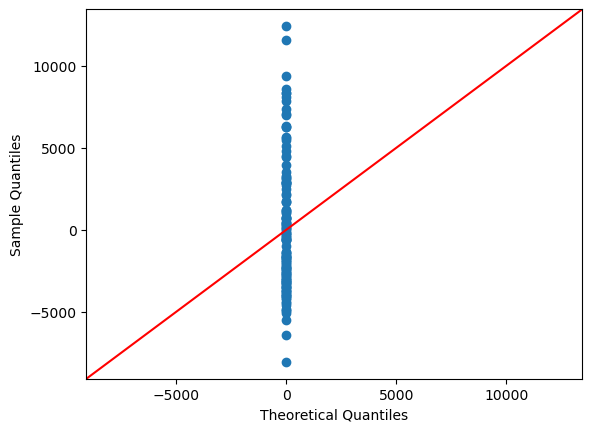

/var/folders/28/cz8y185x3_95dr402vyqqfn40000gn/T/ipykernel_53705/3604251883.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals,shade=True)


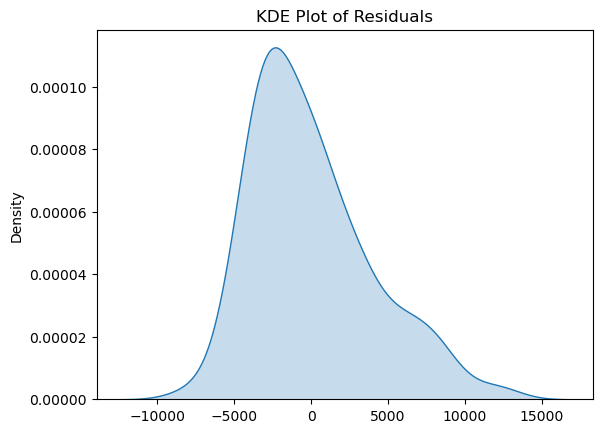

In [48]:
# Plot the residuals on a qq-plot and a histogram 
# superimposed with a kernel density estimate plot.

from statsmodels.graphics.gofplots import qqplot

residuals = results.resid
sm.qqplot(residuals, line='45')
plt.show()

sns.kdeplot(residuals,shade=True)
plt.title('KDE Plot of Residuals')
plt.show()


The P-Value for JB is 0.000114 which is less than .05 meaning we should reject the null hypothesis which indicates the residuals do not follow a normal distribution. The QQ plot adds furhter evidence to this ploted residuals don't follow the line. The KDE plot also supports this. We have to look at whether the other assumptions hold up to determine what failing this assumption means for the model. 

### 2.6.2

Are your residuals correlated? Look at the summary table that you printed in the previous section. There is a Durbin-Watson statistic. A value between 1.5-2.5 indicates no significant correlation. Which derivation/property is invalid if we do not see independence?

The Durbin-Watson statistic is 1.850 which indicates that there is no significant correlation. When this assumptions is violated, it can mean that alot of the values in in the regression results summary are inaccurate. 



### 2.6.3
Homoskedasticity: Use a scatterplot to plot the residuals e on the y-axis against yˆ the fitted values. Is there any sort of pattern? Do your residuals look like they have a constant variance? Which derivation/property is invalid if we do not see constant variance?



In [49]:
fitted_values = results.fittedvalues

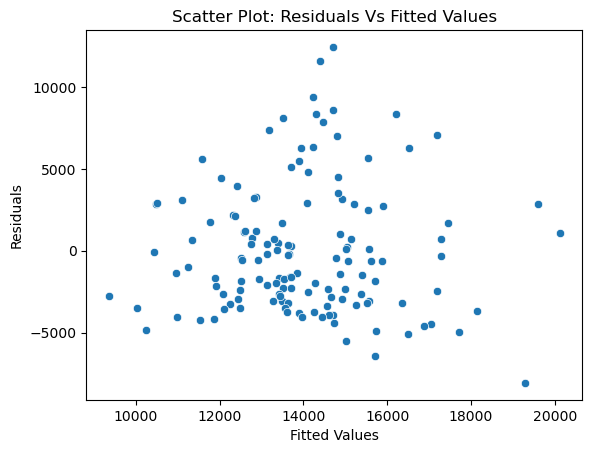

In [50]:
sns.scatterplot(x=fitted_values, y=residuals)
plt.title('Scatter Plot: Residuals Vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Based on the scatterplot there does not appear to be any pattern meaning the Homoskedasticity assumption is satisfied

### 2.6.4

Multicollinearity: For the features that you have included in your model, calculate the variance inflation factors using the statsmodels package. Output this in a pandas dataframe where the index contains the feature names and the single column contains the value of the variance inflation factors. Which features have high VIF factors? What problem is introduced with regard to the hypothesis testing of the β coefficients when multicollinearity is high?

In [51]:
#calculate the variance inflation factors: 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]

print(vif_data)
vif_data.shape

                       features           VIF
0                         const  16120.834340
1    energy used by lights (Wh)      1.226983
2                Laundry_Room_T      1.795246
3                    Bathroom_H      1.382354
4       Outside_Area_Wind_Speed      1.208175
5         Outside_Area_Pressure      1.222802
6  dewpoint_categorical_numeric      1.629913


(7, 2)

In [52]:
#Reset the index to be the feature column. 
vif_data.columns

vif_data = vif_data.set_index('features')

In [53]:
print(vif_data)

                                       VIF
features                                  
const                         16120.834340
energy used by lights (Wh)        1.226983
Laundry_Room_T                    1.795246
Bathroom_H                        1.382354
Outside_Area_Wind_Speed           1.208175
Outside_Area_Pressure             1.222802
dewpoint_categorical_numeric      1.629913


All of the features have low VIF which is well under 10. If multicollinearity is high it can be hard to interpret the unique effects of the features on the target variable.

# Second attempt using temperature in a room as a target variable. 

After discussing the data with the professor it was suggested to change the target variable to a temperature in the house and attempt to create a model around that. 

In [54]:
energy_daily_mean_copy.columns

Index(['energy used by appliances (Wh)', 'energy used by lights (Wh)',
       'Kitchen_T', 'Kitchen_H', 'Living_Room_T', 'Living_Room_H',
       'Laundry_Room_T', 'Laundry_Room_H', 'Office_T', 'Office_H',
       'Bathroom_T', 'Bathroom_H', 'Outside_Building_T', 'Outside_Building_H',
       'Ironing_Room_T', 'Ironing_Room_H', 'Teenager_Room_T',
       'Teenager_Room_H', 'Parents_Room_T', 'Parents_Room_H', 'Outside_Area_T',
       'Outside_Area_Pressure', 'Outside_Area_H', 'Outside_Area_Wind_Speed',
       'Outside_Area_Visibility', 'Outside_Area_Dewpoint', 'Random_variable_1',
       'Random_variable_2', 'average_indoor_T', 'temperature_difference',
       'dewpoint_categorical', 'windspeed_categorical', 'average_indoor_H',
       'humidity_difference', 'dewpoint_categorical_numeric'],
      dtype='object')

Target Variable = Laundry_Room_T
Features: 
    1. Energy used by appliances
    2. Temperature Difference
    3. Atmosphiric Pressure
    4. Wind Speed Categorical
    5. Energy used by lights

In [55]:
X2 = energy_daily_mean_copy[['energy used by appliances (Wh)',
                             'Bathroom_H',
                             'Outside_Area_Wind_Speed',
                             'dewpoint_categorical_numeric',
                             'Outside_Area_Pressure'
                            ]]

y2 = energy_daily_mean_copy['Laundry_Room_T']
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2,X2)
results2 = model2.fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Laundry_Room_T   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     21.41
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.40e-15
Time:                        22:41:01   Log-Likelihood:                -239.28
No. Observations:                 136   AIC:                             490.6
Df Residuals:                     130   BIC:                             508.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             75.2807     14.193      5.304      0.000      47.201     103.361
energy used by appliances (Wh)  8.522e-05   2.87e-05      2.966      0.004    2.84e-05       0.000
Bathroom_H                        -0.1188      0.029     -4.169      0.000      -0.175      -0.062
Outside_Area_Wind_Speed           -0.1554      0.068     -2.275      0.025      -0.290      -0.020
dewpoint_categorical_numeric       2.4935      0.292      8.530      0.000       1.915       3.072
Outside_Area_Pressure             -0.0638      0.018     -3.484      0.001      -0.100      -0.028
==============================================================================
Omnibus:                        3.685   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.732
Skew:                          -0.201   Prob(JB):                        0.255
Kurtosis:                       2.434   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     energy used by appliances (Wh)   R-squared:                       0.192
Model:                                        OLS   Adj. R-squared:                  0.154
Method:                             Least Squares   F-statistic:                     5.107
Date:                            Sat, 08 Jun 2024   Prob (F-statistic):           9.78e-05
Time:                                    22:41:01   Log-Likelihood:                -1317.9
No. Observations:                             136   AIC:                             2650.
Df Residuals:                                 129   BIC:                             2670.
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.359e+04   4.37e+04     -0.311      0.756      -1e+05    7.29e+04
energy used by lights (Wh)       3.4022      0.842      4.042      0.000       1.737       5.067
Laundry_Room_T                 960.4974    243.124      3.951      0.000     479.470    1441.525
Bathroom_H                      81.6546     85.989      0.950      0.344     -88.476     251.785
Outside_Area_Wind_Speed        181.6848    194.808      0.933      0.353    -203.748     567.118
Outside_Area_Pressure            0.0722     53.516      0.001      0.999    -105.811     105.955
dewpoint_categorical_numeric -2160.7254   1015.409     -2.128      0.035   -4169.737    -151.714
==============================================================================
Omnibus:                       16.097   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.152
Skew:                           0.876   Prob(JB):                     0.000114
Kurtosis:                       3.367   Cond. No.                     1.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we change the target variable to be the Laundry room temperature then the model improves. 
- R-Squared is substantially higher
- All of the beta coefficients are signficant. 

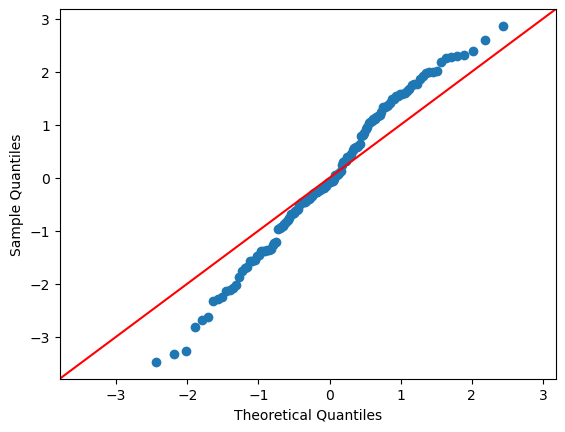

/var/folders/28/cz8y185x3_95dr402vyqqfn40000gn/T/ipykernel_53705/3174384297.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals2,shade=True)


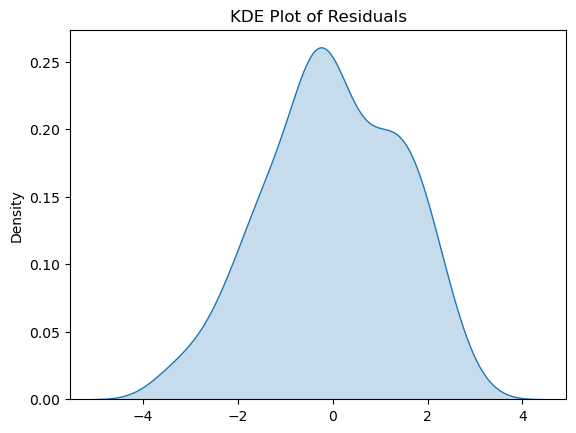

In [57]:
residuals2 = results2.resid
sm.qqplot(residuals2, line='45')
plt.show()

sns.kdeplot(residuals2,shade=True)
plt.title('KDE Plot of Residuals')
plt.show()

The errors follow a normal distribution. The JB p-value also indicates this as it is greater than .05

The Durbin-Watson statistic of .577 indicates that the residual are correlated which violates an assumption which could mean that some of the values in the regression results are inaccurate. 

In [58]:
fitted_values2 = results2.fittedvalues

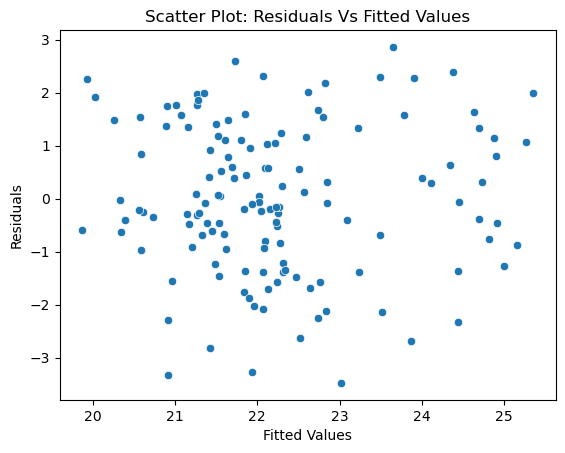

In [59]:
sns.scatterplot(x=fitted_values2, y=residuals2)
plt.title('Scatter Plot: Residuals Vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Homoskedasticity assumption appears to be satisfied

In [60]:
vif_data2 = pd.DataFrame()
vif_data2['features'] = X2.columns
vif_data2['VIF'] = [variance_inflation_factor(X2.values,i) for i in range (X2.shape[1])]

print(vif_data2)


                         features           VIF
0                           const  13255.932169
1  energy used by appliances (Wh)      1.028771
2                      Bathroom_H      1.185551
3         Outside_Area_Wind_Speed      1.159129
4    dewpoint_categorical_numeric      1.054398
5           Outside_Area_Pressure      1.115911


All of the features have low VIF which is well under 10. If multicollinearity is high it can be hard to interpret the unique effects of the features on the target variable.

## Conclusion:

Initially I thought the outside temperature would have a big impact on the amount of energy used in the home. This assumption was based on my own situation where a large percentage of my electricity usage is from air conditioning. However the data in this model shows that outside temperature does not have an impact. Other factors such as how much the lights are used or wind speed and air pressure have a bigger impact. Because there was a low  correlation between the features in this model and the target variable of energy usage it is difficult to come up with a multilinear model that uses 5 features from the data to predict the energy usage. It's actually easier as the second attempt showed to come up with a model to predict the temperature in the laundry room. 